 # Classification Loan Status

### Before we start:

If you like my work, please upvote this kernel as it will keep me motivated to do more in the future and share the kernel with others so we can all benefit from it .

### Introduction:
In this kernel ,I will try to show you how different models can improve just by doing simple process on the data .

we are going to work on **binary classification problem**,
where we got some information about sample of peoples , and we need to predict whether we should give some one a loan or not depending on his information .
we actually have a few sample size (614 rows), so we will go with machine learning techniques to solve our problem .

### what you will learn in this kernel ?

* basics of visualizing the data .
* how to compare between **feature importance** (at less in this data) .

   * **feature selection**
   
   * **feature engineer**
   
   
* some simple techniques to **process** the data .
* handling **missing data** .
* how to deal with **categorical** and **numerical** data .
* **outliers** data detection
* but the most important thing that you will learn , is how to **evaluate your model** at every step you take .
    
### what we will use ?

* some important libraries like **sklearn, matplotlib, numpy, pandas, seaborn, scipy**


* fill the values using **backward 'bfill' method** for numerical columns , and **most frequent value** for categorical columns (simple techniques)


* 4 different models to train your data, so we can compare between them 

    **a) logistic regression**
    
    **b) KNeighborsClassifier**
    
    **C) SVC**
    
    **d) DecisionTreeClassifier**
    
    
**Note** : I am writing this kernel while i am still studying and learning about this field , so if there is any mistake i have made, please feel free to tell me in the comment below, and you can ask me any question about this kernel . 

 So let's start


In [1]:
# Importing some important librarys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

import pycalib
from pycalib import metrics
from sklearn.calibration import calibration_curve

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

# simple look on the data

In [3]:
df.shape

(614, 13)

In [4]:
df.head()

# We got some categorical data, and it's a binary classification (Yes, NO)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.info()

# We have missing data , we will handle them as we go

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# Describe the numerical data

df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# we will change the type of Credit_History to object becaues we can see that it is 1 or 0

df['Credit_History'] = df['Credit_History'].astype('O')

In [8]:
# describe categorical data ("objec")

df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,564.0,614,614
unique,614,2,2,4,2,2,2.0,3,2
top,LP001002,Male,Yes,0,Graduate,No,1.0,Semiurban,Y
freq,1,489,398,345,480,500,475.0,233,422


In [9]:
# we will drop ID because it's not important for our model and it will just mislead the model

df.drop('Loan_ID', axis=1, inplace=True)

In [10]:
df.duplicated().any()

# we got no duplicated rows

False

The percentage of Y class : 0.69
The percentage of N class : 0.31


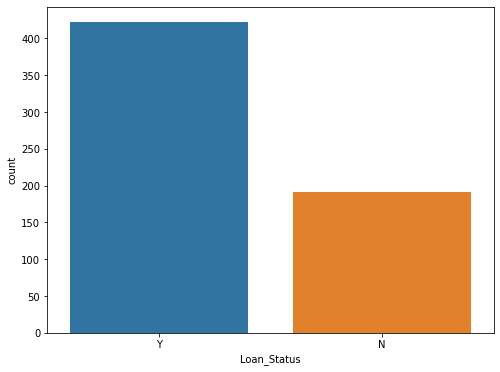

In [11]:
# let's look at the target percentage

plt.figure(figsize=(8,6))
sns.countplot(df['Loan_Status']);

print('The percentage of Y class : %.2f' % (df['Loan_Status'].value_counts()[0] / len(df)))
print('The percentage of N class : %.2f' % (df['Loan_Status'].value_counts()[1] / len(df)))

# We can consider it as imbalanced data, but for now i will not

# let's look deeper in the data

In [12]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### first we will go through the categorical features


In [13]:
df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


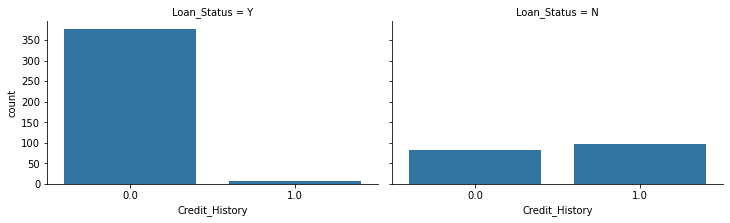

In [14]:
# Credit_History

grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Credit_History');

# we didn't give a loan for most people who got Credit History = 0
# but we did give a loan for most of people who got Credit History = 1
# so we can say if you got Credit History = 1 , you will have better chance to get a loan

# important feature

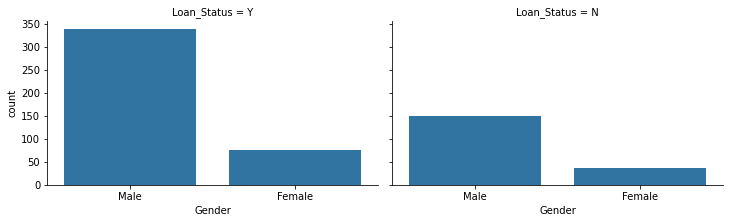

In [15]:
# Gender

grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Gender');

# most males got loan and most females got one too so (No pattern)

# i think it's not so important feature, we will see later

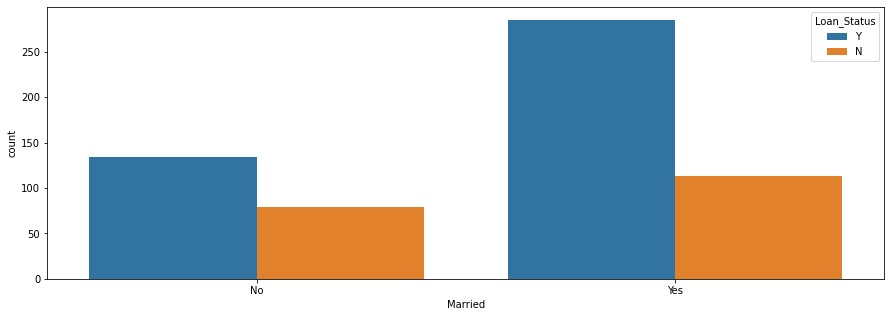

In [16]:
# Married
plt.figure(figsize=(15,5))
sns.countplot(x='Married', hue='Loan_Status', data=df);

# most people who get married did get a loan
# if you'r married then you have better chance to get a loan :)
# good feature

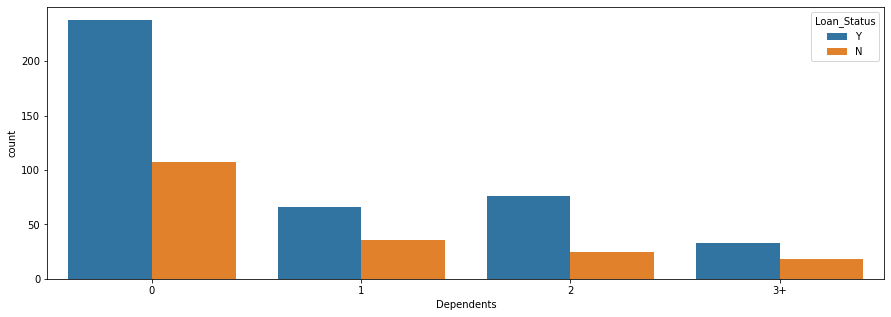

In [17]:
# Dependents

plt.figure(figsize=(15,5))
sns.countplot(x='Dependents', hue='Loan_Status', data=df);

# first if Dependents = 0 , we got higher chance to get a loan ((very hight chance))
# good feature

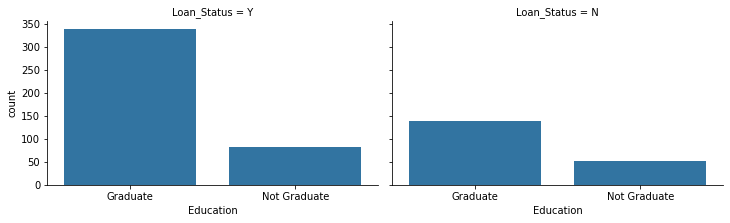

In [18]:
# Education

grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Education');

# If you are graduated or not, you will get almost the same chance to get a loan (No pattern)
# Here you can see that most people did graduated, and most of them got a loan
# on the other hand, most of people who did't graduate also got a loan, but with less percentage from people who graduated

# not important feature

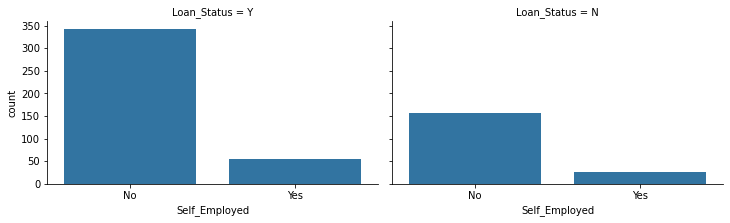

In [19]:
# Self_Employed

grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Self_Employed');

# No pattern (same as Education)

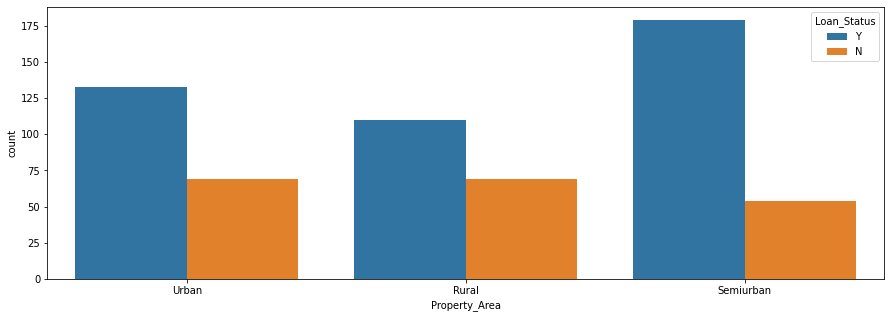

In [20]:
# Property_Area

plt.figure(figsize=(15,5))
sns.countplot(x='Property_Area', hue='Loan_Status', data=df);

# We can say, Semiurban Property_Area got more than 50% chance to get a loan

# good feature

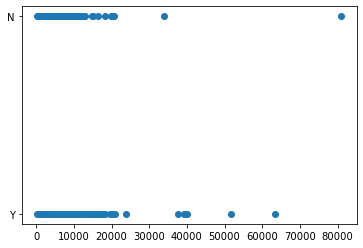

In [21]:
# ApplicantIncome

plt.scatter(df['ApplicantIncome'], df['Loan_Status']);

# No pattern

In [22]:
# the numerical data

df.groupby('Loan_Status').median() # median because Not affected with outliers

# we can see that when we got low median in CoapplicantInocme we got Loan_Status = N

# CoapplicantInocme is a good feature

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Loan_Status,,,,
N,3833.5,268.0,129.0,360.0
Y,3812.5,1239.5,126.0,360.0


# Simple process for the data

### Missing values

here i am just going to use a simple techniques to handle the missing data

In [23]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
# We will separate the numerical columns from the categorical

cat_data = []
num_data = []

for i,c in enumerate(df.dtypes):
    if c == object:
        cat_data.append(df.iloc[:, i])
    else :
        num_data.append(df.iloc[:, i])

In [25]:
cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [26]:
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


In [27]:
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849.0,0.0,NaN,360.0
1,4583.0,1508.0,128.0,360.0
2,3000.0,0.0,66.0,360.0
3,2583.0,2358.0,120.0,360.0
4,6000.0,0.0,141.0,360.0


In [28]:
# cat_data
# If you want to fill every column with its own most frequent value you can use

cat_data = cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any() # no more missing data 

False

In [29]:
# num_data
# fill every missing value with their previous value in the same column

num_data.fillna(method='bfill', inplace=True)
num_data.isnull().sum().any() # no more missing data 

False

### categorical columns

* we are going to use **LabelEncoder** :

    what it is actually do it encode labels with value between 0 and n_classes-1 , [for more examples](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) .

In [30]:
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


In [31]:
# transform the target column

target_values = {'Y': 0 , 'N' : 1}

target = cat_data['Loan_Status']
cat_data.drop('Loan_Status', axis=1, inplace=True)

target = target.map(target_values)

In [32]:
# transform other columns

for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])

In [33]:
target.head()

0    0
1    1
2    0
3    0
4    0
Name: Loan_Status, dtype: int64

In [34]:
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,1,0,0,0,0,1,2
1,1,1,1,0,0,1,0
2,1,1,0,0,1,1,2
3,1,1,0,1,0,1,2
4,1,0,0,0,0,1,2


In [35]:
df = pd.concat([cat_data, num_data, target], axis=1)

In [36]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,1,0,0,0,0,1,2,5849.0,0.0,128.0,360.0,0
1,1,1,1,0,0,1,0,4583.0,1508.0,128.0,360.0,1
2,1,1,0,0,1,1,2,3000.0,0.0,66.0,360.0,0
3,1,1,0,1,0,1,2,2583.0,2358.0,120.0,360.0,0
4,1,0,0,0,0,1,2,6000.0,0.0,141.0,360.0,0


# Train the data

* we will stop here for know and train the data.

    we are going to use **StratifiedShuffleSplit**, for more [information](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html) .

In [37]:
X = pd.concat([cat_data, num_data], axis=1)
y = target 

In [38]:
# we will use StratifiedShuffleSplit to split the data Taking into consideration that we will get the same ratio on the target column

from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train, test in sss.split(X, y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

# almost same ratio
print('\nratio of target in y_train :',y_train.value_counts().values/ len(y_train))
print('ratio of target in y_test :',y_test.value_counts().values/ len(y_test))
print('ratio of target in original_data :',df['Loan_Status'].value_counts().values/ len(df))

X_train shape (491, 11)
y_train shape (491,)
X_test shape (123, 11)
y_test shape (123,)

ratio of target in y_train : [0.68635438 0.31364562]
ratio of target in y_test : [0.69105691 0.30894309]
ratio of target in original_data : [0.68729642 0.31270358]


# My code here
## 1. Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

lregclassifier = LogisticRegression(random_state=42)
lregclassifier.fit(X_train,y_train)
lregprediction = lregclassifier.predict(X_test)
print("Score: ",lregclassifier.score(X_test, y_test))

Score:  0.8130081300813008


In [40]:
lregprediction

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

In [41]:
indexes = y_test.index.values
indexes = indexes.tolist()

In [42]:
y_true = [[] for i in range(len(indexes))]
pred = [[] for i in range(len(indexes))]
for i in range(len(indexes)):
    y_true[i] = (indexes[i], y_test.values[i])
    pred[i] = (indexes[i], lregprediction[i])
# y_true
# pred

In [43]:
scores_lr = lregclassifier.predict_proba(X_test)
scores_lr

array([[0.94838056, 0.05161944],
       [0.66249836, 0.33750164],
       [0.80772777, 0.19227223],
       [0.70390159, 0.29609841],
       [0.82903967, 0.17096033],
       [0.16672418, 0.83327582],
       [0.84224246, 0.15775754],
       [0.73149067, 0.26850933],
       [0.27882047, 0.72117953],
       [0.6323999 , 0.3676001 ],
       [0.85408224, 0.14591776],
       [0.07539974, 0.92460026],
       [0.82014305, 0.17985695],
       [0.81118369, 0.18881631],
       [0.82173045, 0.17826955],
       [0.54970821, 0.45029179],
       [0.82753728, 0.17246272],
       [0.83567396, 0.16432604],
       [0.73936758, 0.26063242],
       [0.80880059, 0.19119941],
       [0.7785508 , 0.2214492 ],
       [0.71700524, 0.28299476],
       [0.82618365, 0.17381635],
       [0.72529137, 0.27470863],
       [0.93144521, 0.06855479],
       [0.12902555, 0.87097445],
       [0.97056382, 0.02943618],
       [0.83395524, 0.16604476],
       [0.87384308, 0.12615692],
       [0.83376055, 0.16623945],
       [0.

In [44]:
# Calculate the ECE value of lregclassifier
pycalib.metrics.binary_ECE(y_test.values, scores_lr[:,1], bins=15)

0.0784468436103581

In [45]:
# brier score
pycalib.metrics.brier_score(y_test.values, lregprediction)

0.18699186991869918

In [46]:
# cross-entropy (log loss)
pycalib.metrics.cross_entropy(y_test.values, lregprediction)

6.458489885164523

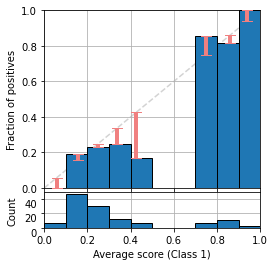

In [47]:
from pycalib.visualisations import plot_reliability_diagram

fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_lr, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)


## 2. KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier

knnclassifier = KNeighborsClassifier()
knnclassifier.fit(X_train, y_train)
knn_prediction = knnclassifier.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, knn_prediction))

Accuracy Score:  0.6016260162601627


In [49]:
knn_pred = [[] for i in range(len(indexes))]
for i in range(len(indexes)):
    knn_pred[i] = (indexes[i], knn_prediction[i])
# knn_pred

In [50]:
scores_knn = knnclassifier.predict_proba(X_test)
scores_knn

array([[0. , 1. ],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.6, 0.4],
       [1. , 0. ],
       [0.4, 0.6],
       [1. , 0. ],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.2, 0.8],
       [1. , 0. ],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.8, 0.2],
       [1. , 0. ],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.6, 0.4],
       [1. , 0. ],
       [0.4, 0.6],
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.6, 0.4],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.4, 0.6],
       [1. , 0. ],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.6,

In [51]:
pycalib.metrics.binary_ECE(y_test.values, scores_knn[:,1], bins=15)

0.22926829268292673

In [52]:
# brier score
pycalib.metrics.brier_score(y_test.values, knn_prediction)

0.3983739837398374

In [53]:
# cross-entropy (log loss)
pycalib.metrics.cross_entropy(y_test.values, knn_prediction)

13.75946045940599

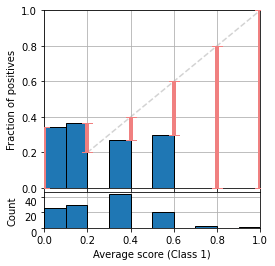

In [54]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_knn, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)


## 3. SVC

In [55]:
from sklearn.svm import SVC

# modify probability=True
svc = SVC(random_state=42, probability=True)
# svc = SVC(gamma='auto', kernel ='linear')
svc.fit(X_train, y_train)
svcprediction = svc.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, svcprediction))

Accuracy Score:  0.6910569105691057


In [56]:
svcpred = [[] for i in range(len(indexes))]
for i in range(len(indexes)):
    svcpred[i] = (indexes[i], svcprediction[i])
# svcpred

In [57]:
# Calculate the ECE value of svc classifier
pycalib.metrics.ECE(y_true, svcpred, normalize=False, bins=15, ece_full=True)

0.0040650406504065045

In [58]:
# brier score
pycalib.metrics.brier_score(y_test.values, svcprediction)

0.3089430894308943

In [59]:
# cross-entropy (log loss)
pycalib.metrics.cross_entropy(y_test.values, svcprediction)

10.67051628460655

In [60]:
scores_svc = svc.predict_proba(X_test)

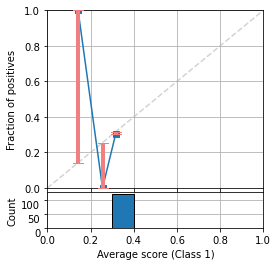

In [61]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test,
                                                [scores_svc, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=False,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)

## 4. Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=1, random_state=42)
dt.fit(X_train, y_train)
dt_prediction = dt.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, dt_prediction))

Accuracy Score:  0.8130081300813008


In [63]:
dt_pred = [[] for i in range(len(indexes))]
for i in range(len(indexes)):
    dt_pred[i] = (indexes[i], dt_prediction[i])
# dt_pred

In [64]:
pycalib.metrics.ECE(y_true, dt_pred, normalize=False, bins=15, ece_full=True)

0.036585365853658534

In [65]:
pycalib.metrics.brier_score(y_test.values, dt_prediction)

0.18699186991869918

In [66]:
pycalib.metrics.cross_entropy(y_test.values, dt_prediction)

6.458483384372407

In [67]:
scores_dt = dt.predict_proba(X_test)

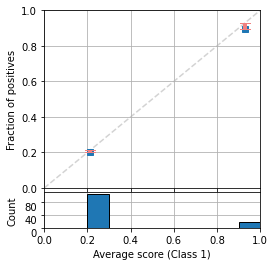

In [68]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test,
                                                [scores_dt, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=False,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)

# Reliability Diagram

In [69]:
classifiers = {"Logistic Regression": lregclassifier,
               "KNN": knnclassifier,
               "SVC": svc,
               "Decision Tree": dt}

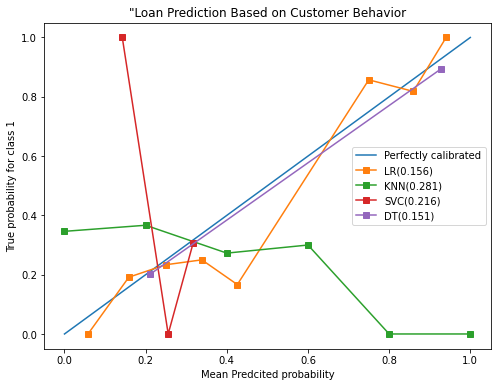

In [70]:
from sklearn.datasets import make_classification as mc
from sklearn.metrics import brier_score_loss # 导入布里尔分数
from sklearn.calibration import calibration_curve # 对概率类模型进行校准，方法是分箱

model = ["LR", "KNN", "SVC", "DT"]
#开始画图
fig,ax1 = plt.subplots(figsize = (8,6))
ax1.plot([0,1],[0,1],label = "Perfectly calibrated") # 绘制对角线，把（0，0），（1，1）连起来
for clf,name_ in zip([lregclassifier, knnclassifier, svc, dt],model):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    if hasattr(clf,"predict_proba"): #对象里如果有这个接口
        prob_pos = clf.predict_proba(X_test)[:,1]
    else: #就是针对SVM
        prob_pos = clf.decision_function(X_test)
        prob_pos = (prob_pos-prob_pos.min())/(prob_pos.max()-prob_pos.min())  #手动归一化
    clf_score = brier_score_loss(y_test,prob_pos,pos_label=y.max())
    #对只有0，1的标签值进行分箱后才能画图
    trueproba, predproba = calibration_curve(y_test, prob_pos, n_bins=10)
    ax1.plot(predproba,trueproba,"s-",label = "%s(%1.3f)"%(name_,clf_score))
    ax1.set_ylabel("True probability for class 1")
    ax1.set_xlabel("Mean Predcited probability")
    ax1.set_ylim([-0.05,1.05])
    ax1.legend()
plt.title('"Loan Prediction Based on Customer Behavior')
plt.savefig('rd4.png')
plt.show()

# Hypothesis Testing

In [71]:
from scipy.stats import percentileofscore
from sklearn.preprocessing import label_binarize
import numpy as np

def label_resampling(probs):
    return np.random.binomial(1, probs)

def score_sampling(probs, samples = 10000, ece_function = None):
    probs = np.array(probs)
    return np.array(
        [
            ece_function(label_resampling(probs), probs) for sample in range(samples)
        ]
    )

def pECE(y_true, probs, samples = 10000, ece_function = pycalib.metrics.binary_ECE):
    probs = np.array(probs)
    return 1 - (
        percentileofscore(
            score_sampling(
                probs,
                samples=samples,
                ece_function=ece_function
            ),
            ece_function(y_true, probs)
        ) / 100
    )

In [72]:
pECE(y_test, scores_lr[:,1])

0.6673

In [73]:
pECE(y_test, scores_knn[:,1])

0.0

In [74]:
pECE(y_test, scores_svc[:,1])

0.7309

In [75]:
pECE(y_test, scores_dt[:,1])

0.8443

# Calibration

In [76]:
from __future__ import division
import numpy as np

from scipy.special import expit

from sklearn.base import clone
from sklearn.utils import check_X_y, indexable
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import _SigmoidCalibration
from sklearn.metrics import log_loss

import warnings

from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import check_array
from sklearn.utils.validation import check_is_fitted
from inspect import signature
from sklearn.isotonic import IsotonicRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import check_cv


from betacal import BetaCalibration


class _DummyCalibration(BaseEstimator, RegressorMixin):
    """Dummy Calibration model. The purpose of this class is to give
    the CalibratedClassifierCV class the option to just return the
    probabilities of the base classifier.
    """
    def fit(self, *args, **kwargs):
        """Does nothing"""
        return self

    def predict_proba(self, T):
        """Return the probabilities of the base classifier"""
        return T

    def predict(self, scores, *args, **kwargs):
        proba = self.predict_proba(scores, *args, **kwargs)
        return proba.argmax(axis=1)


class IsotonicCalibration(IsotonicRegression):
    def __init__(self):
        super(IsotonicCalibration, self).__init__(y_min=0.0, y_max=1.0,
                                                  increasing=True,
                                                  out_of_bounds='clip')

    def fit(self, scores, y, *args, **kwargs):
        '''
        Score=0 corresponds to y=0, and score=1 to y=1
        Parameters
        ----------
        scores : array-like, shape = [n_samples,]
            Data.
        y : array-like, shape = [n_samples, ]
            Labels.
        Returns
        -------
        self
        '''
        if len(scores.shape) > 1:
            scores = scores[:, 1]
        return super(IsotonicCalibration, self).fit(scores, y, *args, **kwargs)

    def predict_proba(self, scores, *args, **kwargs):
        if len(scores.shape) > 1:
            scores = scores[:, 1]
        transformed = self.transform(scores, *args, **kwargs)
        if len(transformed.shape) == 1:
            transformed = np.vstack((1 - transformed, transformed)).T
        return transformed

    def predict(self, scores, *args, **kwargs):
        proba = self.predict_proba(scores, *args, **kwargs)
        return proba.argmax(axis=1)


def logit(x):
    eps = np.finfo(x.dtype).eps
    x = np.clip(x, eps, 1-eps)
    return np.log(x/(1 - x))


def log_encode(x):
    eps = np.finfo(x.dtype).eps
    x = np.clip(x, eps, 1)
    return np.log(x)


class LogisticCalibration(LogisticRegression):
    def __init__(self, C=1.0, solver='lbfgs', multi_class='multinomial',
                 log_transform=True):
        self.C_grid = C
        self.C = C if isinstance(C, float) else C[0]
        self.solver = solver
        self.log_transform = log_transform
        self.encode = log_encode if log_transform else logit
        self.multiclass = multi_class
        super(LogisticCalibration, self).__init__(C=C, solver=solver,
                                                  multi_class=multi_class)

    def fit(self, scores, y, X_val=None, y_val=None, *args, **kwargs):
        if isinstance(self.C_grid, list):
            calibrators = []
            losses = np.zeros(len(self.C_grid))
            for i, C in enumerate(self.C_grid):
                cal = LogisticCalibration(C=C, solver=self.solver,
                                          multi_class=self.multi_class,
                                          log_transform=self.log_transform)
                cal.fit(scores, y)
                losses[i] = log_loss(y_val, cal.predict_proba(X_val))
                calibrators.append(cal)
            best_idx = losses.argmin()
            self.C = calibrators[best_idx].C
        return super(LogisticCalibration, self).fit(self.encode(scores), y,
                                                    *args, **kwargs)

    def predict_proba(self, scores, *args, **kwargs):
        return super(LogisticCalibration,
                     self).predict_proba(self.encode(scores), *args, **kwargs)

    def predict(self, scores, *args, **kwargs):
        return super(LogisticCalibration, self).predict(self.encode(scores),
                                                        *args, **kwargs)


class SigmoidCalibration(_SigmoidCalibration):
    def fit(self, scores, y, *args, **kwargs):
        if len(scores.shape) > 1:
            scores = scores[:, 1]
        return super(SigmoidCalibration, self).fit(scores, y, *args, **kwargs)

    def predict_proba(self, scores, *args, **kwargs):
        if len(scores.shape) > 1:
            scores = scores[:, 1]
        transformed = super(SigmoidCalibration, self).predict(scores, *args, **kwargs)
        return np.vstack((1 - transformed, transformed)).T

    def predict(self, *args, **kwargs):
        proba = self.predict_proba(*args, **kwargs)
        return proba.argmax(axis=1)


class BinningCalibration(BaseEstimator, RegressorMixin):
    def __init__(self, n_bins=10, strategy='uniform', alpha=1.0):
        '''
        alpha : Laplace smoothing (x + a)/(N + 2a)
        n_bins: Number of bins
        stragegy:
                - uniform: for equal width bins
                - quantile: for equal frequency bins
                - kmeans: for each bin with same nearest center to a 1D k-means
        '''
        self.strategy = strategy
        self.n_bins = n_bins
        self.n_bins_grid = n_bins
        self.alpha = alpha

    def fit(self, scores, y, X_val=None, y_val=None, *args, **kwargs):
        '''
        Score=0 corresponds to y=0, and score=1 to y=1
        Parameters
        ----------
        scores : array-like, shape = [n_samples,]
            Data.
        y : array-like, shape = [n_samples, ]
            Labels.
        Returns
        -------
        self
        '''
        if isinstance(self.n_bins, list):
            if X_val is None or y_val is None:
                raise ValueError(('If n_bins is a list, scores_val and y_val'
                                  'are required during fit'))
            calibrators = []
            losses = []
            for n_bins in self.n_bins:
                cal = BinningCalibration(n_bins=n_bins, strategy=self.strategy,
                                         alpha=self.alpha)
                cal.fit(scores, y)
                predict = cal.predict_proba(X_val)
                losses.append(log_loss(y_val, predict))
                calibrators.append(cal)
            best_idx = np.argmin(losses)
            self.n_bins = calibrators[best_idx].n_bins
            self.bins = calibrators[best_idx].bins
            self.predictions = calibrators[best_idx].predictions
            return self

        if len(np.shape(scores)) > 1:
            scores = scores[:, 1]
        # TODO check that this code is correct:
        if self.strategy == 'quantile':
            self.bins = np.sort(scores)[::int(np.ceil(len(scores)
                                                      / self.n_bins))]
            self.bins = np.hstack([self.bins, scores[-1]])
        elif self.strategy == 'uniform':
            self.bins = np.linspace(scores.min(), scores.max(), self.n_bins+1)
        else:
            raise ValueError('Strategy {} not implemented'.format(
                                 self.strategy))
        self.bins[0] = - np.inf
        self.bins[-1] = np.inf
        s_binned = np.digitize(scores, self.bins) - 1
        self.predictions = np.zeros(self.n_bins)
        for i in range(self.n_bins):
            self.predictions[i] = ((np.sum(y[s_binned == i]) + self.alpha)
                                   / (np.sum(s_binned == i) + self.alpha*2))

        return self

    def predict_proba(self, scores, *args, **kwargs):
        if len(np.shape(scores)) > 1:
            scores = scores[:, 1]
        s_binned = np.digitize(scores, self.bins) - 1
        transformed = self.predictions[s_binned]
        return np.vstack((1 - transformed, transformed)).T

    def predict(self, scores, *args, **kwargs):
        proba = self.predict_proba(scores, *args, **kwargs)
        return proba.argmax(axis=1)


class CalibratedModel(BaseEstimator, ClassifierMixin):
    def __init__(self, base_estimator=None, calibrator=None,
                 fit_estimator=True):
        ''' Initialize a Calibrated model (classifier + calibrator)
        Parameters
        ----------
        base_estimator : estimator
            Classifier instance
        calibrator : estimator
            Calibrator instance
        '''
        self.calibrator = clone(calibrator)
        self.base_estimator = clone(base_estimator)
        self.fit_estimator = fit_estimator
        self.binary = False

    def fit(self, X, y, X_val=None, y_val=None, *args, **kwargs):
        """Fit the calibrated model
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Training data.
        y : array-like, shape (n_samples, n_classes)
            Target values.
        Returns
        -------
        self : object
            Returns an instance of self.
        """

        X, y = check_X_y(X, y, accept_sparse=['csc', 'csr', 'coo'],
                         multi_output=True)
        X, y = indexable(X, y)

        if self.fit_estimator:
            self.base_estimator.fit(X, y)

        scores = self.base_estimator.predict_proba(X)

        if scores.shape[1] == 2:
            self.binary = True

        if self.binary:
            try:
                self.calibrator.fit(scores, y, *args, **kwargs)
            except ValueError:
                self.calibrator.fit(scores[:, 1], y, *args, **kwargs)
        else:
            self.calibrator.fit(scores, y, *args, **kwargs)

        return self

    def predict_proba(self, X):
        """Posterior probabilities of classification
        This function returns posterior probabilities of classification
        according to each class on an array of test vectors X.
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The samples.
        Returns
        -------
        C : array, shape (n_samples, n_classes)
            The predicted probas. Can be exact zeros.
        """

        scores = self.base_estimator.predict_proba(X)

        if self.binary:
            try:
                predictions = self.calibrator.predict_proba(scores)
            except ValueError:
                predictions = self.calibrator.predict_proba(scores[:, 1])

            if (len(predictions.shape) == 1) or (predictions.shape[1] == 1):
                predictions = np.vstack((1 - predictions, predictions)).T
        else:
            predictions = self.calibrator.predict_proba(scores)

        return predictions

    def predict(self, X):
        """Predict the target of new samples. Can be different from the
        prediction of the uncalibrated classifier.
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The samples.
        Returns
        -------
        C : array, shape (n_samples,)
            The predicted class.
        """
        check_is_fitted(self, ["calibrator"])

        return np.argmax(self.predict_proba(X), axis=1)


class CalibratedClassifierCV(BaseEstimator, ClassifierMixin):
    """Probability calibration with isotonic regression, sigmoid or beta.
    With this class, the base_estimator is fit on the train set of the
    cross-validation generator and the test set is used for calibration.
    The probabilities for each of the folds are then averaged
    for prediction. In case cv="prefit" is passed to __init__,
    it is assumed that base_estimator has been
    fitted already and all data is used for calibration. Note that
    data for fitting the classifier and for calibrating it must be disjoint.
    Read more in the :ref:`User Guide <calibration>`.
    Parameters
    ----------
    base_estimator : instance BaseEstimator
        The classifier whose output decision function needs to be calibrated
        to offer more accurate predict_proba outputs. If cv=prefit, the
        classifier must have been fit already on data.
    method : None, 'sigmoid', 'isotonic', 'beta', 'beta_am' or 'beta_ab'
        The method to use for calibration. Can be 'sigmoid' which
        corresponds to Platt's method, 'isotonic' which is a
        non-parameteric approach or 'beta', 'beta_am' or 'beta_ab' which
        correspond to three different beta calibration methods. It is
        not advised to use  isotonic  calibration with too few calibration
        samples ``(<<1000)`` since it tends to overfit.
        Use beta models in this case.
    cv : integer, cross-validation generator, iterable or "prefit", optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
        - None, to use the default 3-fold cross-validation,
        - integer, to specify the number of folds.
        - An object to be used as a cross-validation generator.
        - An iterable yielding train/test splits.
        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If ``y`` is neither binary nor
        multiclass, :class:`KFold` is used.
        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validation strategies that can be used here.
        If "prefit" is passed, it is assumed that base_estimator has been
        fitted already and all data is used for calibration.
    Attributes
    ----------
    classes_ : array, shape (n_classes)
        The class labels.
    calibrated_classifiers_: list (len() equal to cv or 1 if cv == "prefit")
        The list of calibrated classifiers, one for each cross-validation fold,
        which has been fitted on all but the validation fold and calibrated
        on the validation fold.
    References
    ----------
    .. [1] Obtaining calibrated probability estimates from decision trees
           and naive Bayesian classifiers, B. Zadrozny & C. Elkan, ICML 2001
    .. [2] Transforming Classifier Scores into Accurate Multiclass
           Probability Estimates, B. Zadrozny & C. Elkan, (KDD 2002)
    .. [3] Probabilistic Outputs for Support Vector Machines and Comparisons to
           Regularized Likelihood Methods, J. Platt, (1999)
    .. [4] Predicting Good Probabilities with Supervised Learning,
           A. Niculescu-Mizil & R. Caruana, ICML 2005
    """
    def __init__(self, base_estimator=None, method=None, cv=3,
                 score_type=None):
        self.base_estimator = base_estimator
        self.method = method
        self.cv = cv
        self.score_type = score_type

    def fit(self, X, y, sample_weight=None):
        """Fit the calibrated model
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Training data.
        y : array-like, shape (n_samples,)
            Target values.
        sample_weight : array-like, shape = [n_samples] or None
            Sample weights. If None, then samples are equally weighted.
        Returns
        -------
        self : object
            Returns an instance of self.
        """
        X, y = check_X_y(X, y, accept_sparse=['csc', 'csr', 'coo'],
                         force_all_finite=False)
        X, y = indexable(X, y)
        lb = LabelBinarizer().fit(y)
        self.classes_ = lb.classes_

        # Check that each cross-validation fold can have at least one
        # example per class
        n_folds = self.cv if isinstance(self.cv, int) \
            else self.cv.n_folds if hasattr(self.cv, "n_folds") else None
        if n_folds and \
           np.any([np.sum(y == class_) < n_folds for class_ in self.classes_]):
            raise ValueError("Requesting %d-fold cross-validation but provided"
                             " less than %d examples for at least one class."
                             % (n_folds, n_folds))

        self.calibrated_classifiers_ = []
        if self.base_estimator is None:
            # we want all classifiers that don't expose a random_state
            # to be deterministic (and we don't want to expose this one).
            base_estimator = LinearSVC(random_state=0)
        else:
            base_estimator = self.base_estimator

        if self.cv == "prefit":
            calibrated_classifier = _CalibratedClassifier(
                base_estimator, method=self.method, score_type=self.score_type)
            if sample_weight is not None:
                calibrated_classifier.fit(X, y, sample_weight)
            else:
                calibrated_classifier.fit(X, y)
            self.calibrated_classifiers_.append(calibrated_classifier)
        else:
            cv = check_cv(self.cv, y, classifier=True)
            fit_parameters = signature(base_estimator.fit).parameters
            estimator_name = type(base_estimator).__name__
            if (sample_weight is not None
                    and "sample_weight" not in fit_parameters):
                warnings.warn("%s does not support sample_weight. Samples"
                              " weights are only used for the calibration"
                              " itself." % estimator_name)
                base_estimator_sample_weight = None
            else:
                base_estimator_sample_weight = sample_weight
            for train, test in cv.split(X, y):
                this_estimator = clone(base_estimator)
                if base_estimator_sample_weight is not None:
                    this_estimator.fit(
                        X[train], y[train],
                        sample_weight=base_estimator_sample_weight[train])
                else:
                    this_estimator.fit(X[train], y[train])

                calibrated_classifier = _CalibratedClassifier(
                    this_estimator, method=self.method,
                    score_type=self.score_type)
                if sample_weight is not None:
                    calibrated_classifier.fit(X[test], y[test],
                                              sample_weight[test])
                else:
                    calibrated_classifier.fit(X[test], y[test])
                self.calibrated_classifiers_.append(calibrated_classifier)

        return self

    def predict_proba(self, X):
        """Posterior probabilities of classification
        This function returns posterior probabilities of classification
        according to each class on an array of test vectors X.
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The samples.
        Returns
        -------
        C : array, shape (n_samples, n_classes)
            The predicted probas.
        """
        check_is_fitted(self, ["classes_", "calibrated_classifiers_"])
        X = check_array(X, accept_sparse=['csc', 'csr', 'coo'],
                        force_all_finite=False)
        # Compute the arithmetic mean of the predictions of the calibrated
        # classfiers
        mean_proba = np.zeros((X.shape[0], len(self.classes_)))
        for calibrated_classifier in self.calibrated_classifiers_:
            proba = calibrated_classifier.predict_proba(X)
            mean_proba += proba

        mean_proba /= len(self.calibrated_classifiers_)

        return mean_proba

    def calibrate_scores(self, df):
        """Posterior probabilities of classification
        This function returns posterior probabilities of classification
        according to each class on an array of test vectors X.
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The samples.
        Returns
        -------
        C : array, shape (n_samples, n_classes)
            The predicted probas.
        """
        check_is_fitted(self, ["classes_", "calibrated_classifiers_"])
        # Compute the arithmetic mean of the predictions of the calibrated
        # classifiers
        df = df.reshape(-1, 1)
        mean_proba = np.zeros((len(df), len(self.classes_)))
        for calibrated_classifier in self.calibrated_classifiers_:
            proba = calibrated_classifier.calibrate_scores(df)
            mean_proba += proba

        mean_proba /= len(self.calibrated_classifiers_)

        return mean_proba

    def predict(self, X):
        """Predict the target of new samples. Can be different from the
        prediction of the uncalibrated classifier.
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The samples.
        Returns
        -------
        C : array, shape (n_samples,)
            The predicted class.
        """
        check_is_fitted(self, ["classes_", "calibrated_classifiers_"])
        return self.classes_[np.argmax(self.predict_proba(X), axis=1)]


class _CalibratedClassifier(object):
    """Probability calibration with isotonic regression or sigmoid.
    It assumes that base_estimator has already been fit, and trains the
    calibration on the input set of the fit function. Note that this class
    should not be used as an estimator directly. Use CalibratedClassifierCV
    with cv="prefit" instead.
    Parameters
    ----------
    base_estimator : instance BaseEstimator
        The classifier whose output decision function needs to be calibrated
        to offer more accurate predict_proba outputs. No default value since
        it has to be an already fitted estimator.
    method : 'sigmoid' | 'isotonic' | 'beta' | 'beta_am' | 'beta_ab'
        The method to use for calibration. Can be 'sigmoid' which
        corresponds to Platt's method, 'isotonic' which is a
        non-parameteric approach based on isotonic regression or 'beta',
        'beta_am' or 'beta_ab' which correspond to beta calibration methods.
    References
    ----------
    .. [1] Obtaining calibrated probability estimates from decision trees
           and naive Bayesian classifiers, B. Zadrozny & C. Elkan, ICML 2001
    .. [2] Transforming Classifier Scores into Accurate Multiclass
           Probability Estimates, B. Zadrozny & C. Elkan, (KDD 2002)
    .. [3] Probabilistic Outputs for Support Vector Machines and Comparisons to
           Regularized Likelihood Methods, J. Platt, (1999)
    .. [4] Predicting Good Probabilities with Supervised Learning,
           A. Niculescu-Mizil & R. Caruana, ICML 2005
    """
    def __init__(self, base_estimator, method='beta',
                 score_type=None):
        self.base_estimator = base_estimator
        self.method = method
        self.score_type = score_type

    def _preproc(self, X):
        n_classes = len(self.classes_)
        if self.score_type is None:
            if hasattr(self.base_estimator, "decision_function"):
                df = self.base_estimator.decision_function(X)
                if df.ndim == 1:
                    df = df[:, np.newaxis]
            elif hasattr(self.base_estimator, "predict_proba"):
                df = self.base_estimator.predict_proba(X)
                if n_classes == 2:
                    df = df[:, 1:]
            else:
                raise RuntimeError('classifier has no decision_function or '
                                   'predict_proba method.')
        else:
            if self.score_type == "sigmoid":
                df = self.base_estimator.decision_function(X)
                df = expit(df)
                if df.ndim == 1:
                    df = df[:, np.newaxis]
            else:
                if hasattr(self.base_estimator, self.score_type):
                    df = getattr(self.base_estimator, self.score_type)(X)
                    if self.score_type == "decision_function":
                        if df.ndim == 1:
                            df = df[:, np.newaxis]
                    elif self.score_type == "predict_proba":
                        if n_classes == 2:
                            df = df[:, 1:]
                else:
                    raise RuntimeError('classifier has no ' + self.score_type
                                       + 'method.')

        idx_pos_class = np.arange(df.shape[1])

        return df, idx_pos_class

    def fit(self, X, y, sample_weight=None):
        """Calibrate the fitted model
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Training data.
        y : array-like, shape (n_samples,)
            Target values.
        sample_weight : array-like, shape = [n_samples] or None
            Sample weights. If None, then samples are equally weighted.
        Returns
        -------
        self : object
            Returns an instance of self.
        """
        lb = LabelBinarizer()
        Y = lb.fit_transform(y)
        self.classes_ = lb.classes_

        df, idx_pos_class = self._preproc(X)
        self.calibrators_ = []

        for k, this_df in zip(idx_pos_class, df.T):
            if self.method is None:
                calibrator = _DummyCalibration()
            elif self.method == 'isotonic':
                calibrator = IsotonicRegression(out_of_bounds='clip')
            elif self.method == 'sigmoid':
                calibrator = _SigmoidCalibration()
            # TODO Remove BetaCalibration
            elif self.method == 'beta':
                calibrator = BetaCalibration(parameters="abm")
            elif self.method == 'beta_am':
                calibrator = BetaCalibration(parameters="am")
            elif self.method == 'beta_ab':
                calibrator = BetaCalibration(parameters="ab")
            else:
                raise ValueError('method should be None, "sigmoid", '
                                 '"isotonic", "beta", "beta2" or "beta05". '
                                 'Got %s.' % self.method)
            calibrator.fit(this_df, Y[:, k], sample_weight)
            self.calibrators_.append(calibrator)

        return self

    def predict_proba(self, X):
        """Posterior probabilities of classification
        This function returns posterior probabilities of classification
        according to each class on an array of test vectors X.
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The samples.
        Returns
        -------
        C : array, shape (n_samples, n_classes)
            The predicted probas. Can be exact zeros.
        """
        n_classes = len(self.classes_)
        proba = np.zeros((X.shape[0], n_classes))

        df, idx_pos_class = self._preproc(X)
        for k, this_df, calibrator in \
                zip(idx_pos_class, df.T, self.calibrators_):
            if n_classes == 2:
                k += 1
            proba[:, k] = calibrator.predict(this_df)

        # Normalize the probabilities
        if n_classes == 2:
            proba[:, 0] = 1. - proba[:, 1]
        else:
            proba /= np.sum(proba, axis=1)[:, np.newaxis]

        # XXX : for some reason all probas can be 0
        proba[np.isnan(proba)] = 1. / n_classes

        # Deal with cases where the predicted probability minimally exceeds 1.0
        proba[(1.0 < proba) & (proba <= 1.0 + 1e-5)] = 1.0

        return proba

    def calibrate_scores(self, df):
        """Posterior probabilities of classification
        This function returns posterior probabilities of classification
        according to each class on an array of test vectors X.
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The samples.
        Returns
        -------
        C : array, shape (n_samples, n_classes)
            The predicted probas. Can be exact zeros.
        """
        n_classes = len(self.classes_)
        proba = np.zeros((len(df), n_classes))
        idx_pos_class = [0]

        for k, this_df, calibrator in \
                zip(idx_pos_class, df.T, self.calibrators_):
            if n_classes == 2:
                k += 1
            pro = calibrator.predict(this_df)
            if np.any(np.isnan(pro)):
                pro[np.isnan(pro)] = calibrator.predict(this_df[np.isnan(
                    pro)] + 1e-300)
            proba[:, k] = pro

        # Normalize the probabilities
        if n_classes == 2:
            proba[:, 0] = 1. - proba[:, 1]
        else:
            proba /= np.sum(proba, axis=1)[:, np.newaxis]

        # XXX : for some reason all probas can be 0
        proba[np.isnan(proba)] = 1. / n_classes

        # Deal with cases where the predicted probability minimally exceeds 1.0
        proba[(1.0 < proba) & (proba <= 1.0 + 1e-5)] = 1.0
        return proba

In [77]:
def plot_calibration_curve(y_true, y_prob, n_bins=5, ax=None, hist=True, normalize=False):
    prob_true, prob_pred = calibration_curve(y_true, y_prob, n_bins=n_bins, normalize=normalize)
    if ax is None:
        ax = plt.gca()
    if hist:
        ax.hist(y_prob, weights=np.ones_like(y_prob) / len(y_prob), alpha=.4,
               bins=np.maximum(10, n_bins))
    ax.plot([0, 1], [0, 1], ':', c='k')
    curve = ax.plot(prob_pred, prob_true, marker="o")

    ax.set_xlabel("predicted probability")
    ax.set_ylabel("fraction of positive samples")

    ax.set(aspect='equal')
    return curve

## 1. LR

In [78]:
# sigmoid
cal_lr_sigm = CalibratedClassifierCV(lregclassifier, cv="prefit", method='sigmoid')
cal_lr_sigm.fit(X_test, y_test)
scores_lr_sigm = cal_lr_sigm.predict_proba(X_test)

# Cross-validated Calibration
cal_lr_sigm_cv = CalibratedClassifierCV(lregclassifier, method='sigmoid')
cal_lr_sigm_cv.fit(X_train, y_train)
scores_lr_sigm_cv = cal_lr_sigm_cv.predict_proba(X_test)

# isotonic
cal_lr_iso = CalibratedClassifierCV(lregclassifier, cv="prefit", method='isotonic')
cal_lr_iso.fit(X_test, y_test)
scores_lr_iso = cal_lr_iso.predict_proba(X_test)

# Cross-validated Calibration
cal_lr_iso_cv = CalibratedClassifierCV(lregclassifier, method='isotonic')
cal_lr_iso_cv.fit(X_train, y_train)
scores_lr_iso_cv = cal_lr_iso_cv.predict_proba(X_test)

# beta
cal_lr_beta = CalibratedClassifierCV(lregclassifier, method='beta')
cal_lr_beta.fit(X_train, y_train)
scores_lr_beta = cal_lr_beta.predict_proba(X_test)

# Cross-validated Calibration
cal_lr_beta_cv = CalibratedClassifierCV(lregclassifier, cv="prefit", method='beta')
cal_lr_beta_cv.fit(X_test, y_test)
scores_lr_beta_cv = cal_lr_beta_cv.predict_proba(X_test)

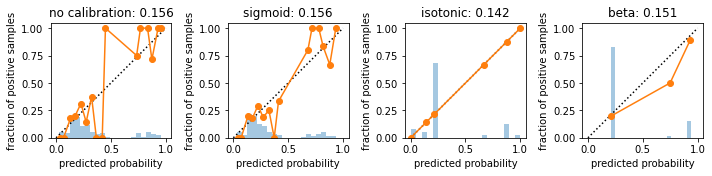

In [171]:
fig, axes = plt.subplots(1, 4, figsize=(10, 4))

for name, s, ax in zip(['no calibration', 'sigmoid', 'isotonic', 'beta'],
                       [scores_lr[:, 1], scores_lr_sigm[:, 1], scores_lr_iso[:, 1], scores_lr_beta[:, 1]], axes):
    plot_calibration_curve(y_test, s, n_bins=20, ax=ax)
    ax.set_title("{}: {:.3f}".format(name, brier_score_loss(y_test, s)))
plt.tight_layout()
plt.savefig("LR after.png")

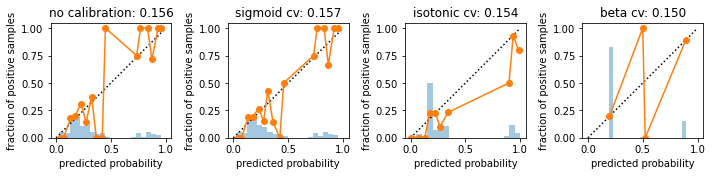

In [170]:
fig, axes = plt.subplots(1, 4, figsize=(10, 4))

for name, s, ax in zip(['no calibration', 'sigmoid cv', 'isotonic cv', 'beta cv'],
                       [scores_lr[:, 1], scores_lr_sigm_cv[:, 1], scores_lr_iso_cv[:, 1], scores_lr_beta_cv[:, 1]], axes):
    plot_calibration_curve(y_test, s, n_bins=20, ax=ax)
    ax.set_title("{}: {:.3f}".format(name, brier_score_loss(y_test, s)))
plt.tight_layout()
plt.savefig("LR+CV.png")

In [81]:
pECE(y_test.values, scores_lr_sigm[:,1])

0.9118999999999999

In [82]:
pECE(y_test.values, scores_lr_sigm_cv[:,1])

0.6355999999999999

In [83]:
pECE(y_test.values, scores_lr_iso[:,1])

0.99745

In [84]:
pECE(y_test.values, scores_lr_iso_cv[:,1])

0.17379999999999995

In [85]:
pECE(y_test.values, scores_lr_beta[:,1])

0.75895

In [86]:
pECE(y_test.values, scores_lr_beta_cv[:,1])

0.99295

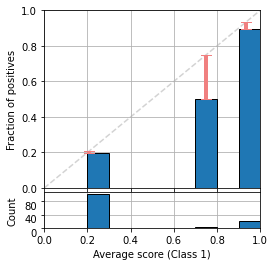

In [87]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_lr_beta, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('lr_beta.png')

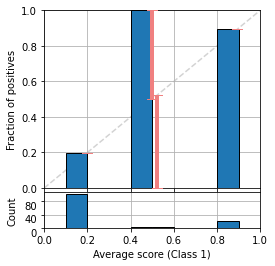

In [88]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_lr_beta_cv, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('lr_beta_cv.png')

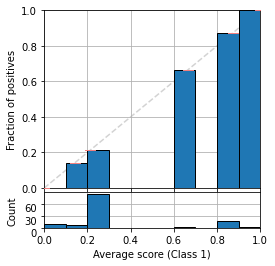

In [89]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_lr_iso, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('lr_iso.png')

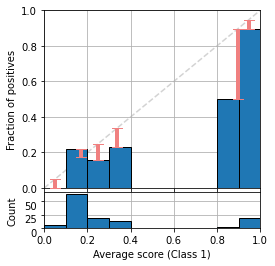

In [90]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_lr_iso_cv, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('lr_iso_cv.png')

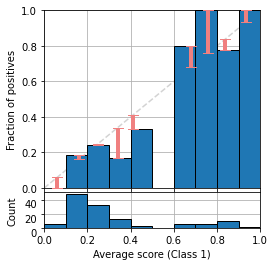

In [91]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_lr_sigm, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('lr_sigm.png')

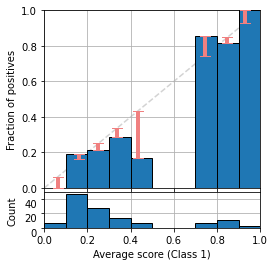

In [92]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_lr_sigm_cv, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('lr_sigm_cv.png')

## 2. KNN

In [93]:
# sigmoid
cal_knn_sigm = CalibratedClassifierCV(knnclassifier, cv="prefit", method='sigmoid')
cal_knn_sigm.fit(X_test, y_test)
scores_knn_sigm = cal_knn_sigm.predict_proba(X_test)

# Cross-validated Calibration
cal_knn_sigm_cv = CalibratedClassifierCV(knnclassifier, method='sigmoid')
cal_knn_sigm_cv.fit(X_train, y_train)
scores_knn_sigm_cv = cal_knn_sigm_cv.predict_proba(X_test)

# isotonic
cal_knn_iso = CalibratedClassifierCV(knnclassifier, cv="prefit", method='isotonic')
cal_knn_iso.fit(X_test, y_test)
scores_knn_iso = cal_knn_iso.predict_proba(X_test)

# Cross-validated Calibration
cal_knn_iso_cv = CalibratedClassifierCV(knnclassifier, method='isotonic')
cal_knn_iso_cv.fit(X_train, y_train)
scores_knn_iso_cv = cal_knn_iso_cv.predict_proba(X_test)

# beta
cal_knn_beta = CalibratedClassifierCV(knnclassifier, method='beta')
cal_knn_beta.fit(X_train, y_train)
scores_knn_beta = cal_knn_beta.predict_proba(X_test)

# Cross-validated Calibration
cal_knn_beta_cv = CalibratedClassifierCV(knnclassifier, cv="prefit", method='beta')
cal_knn_beta_cv.fit(X_test, y_test)
scores_knn_beta_cv = cal_knn_beta_cv.predict_proba(X_test)

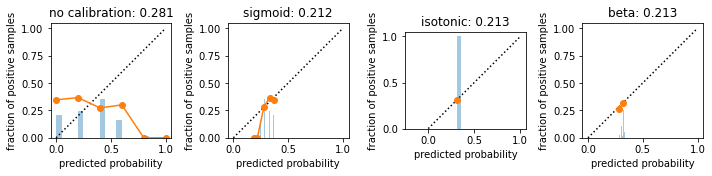

In [94]:
fig, axes = plt.subplots(1, 4, figsize=(10, 4))

for name, s, ax in zip(['no calibration', 'sigmoid', 'isotonic', 'beta'],
                       [scores_knn[:, 1], scores_knn_sigm[:, 1], scores_knn_iso[:, 1], scores_knn_beta[:, 1]], axes):
    plot_calibration_curve(y_test, s, n_bins=20, ax=ax)
    ax.set_title("{}: {:.3f}".format(name, brier_score_loss(y_test, s)))
plt.tight_layout()
plt.savefig("KNN after.png")

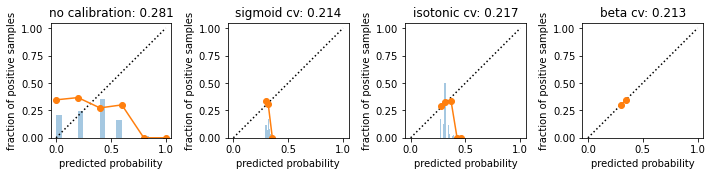

In [95]:
fig, axes = plt.subplots(1, 4, figsize=(10, 4))

for name, s, ax in zip(['no calibration', 'sigmoid cv', 'isotonic cv', 'beta cv'],
                       [scores_knn[:, 1], scores_knn_sigm_cv[:, 1], scores_knn_iso_cv[:, 1], scores_knn_beta_cv[:, 1]], axes):
    plot_calibration_curve(y_test, s, n_bins=20, ax=ax)
    ax.set_title("{}: {:.3f}".format(name, brier_score_loss(y_test, s)))
plt.tight_layout()
plt.savefig("KNN+CV.png")

In [96]:
pECE(y_test.values, scores_knn_sigm[:,1])

0.98685

In [97]:
pECE(y_test.values, scores_knn_sigm_cv[:,1])

0.7984

In [98]:
pECE(y_test.values, scores_knn_iso[:,1])

0.9584

In [99]:
pECE(y_test.values, scores_knn_iso_cv[:,1])

0.4418500000000001

In [100]:
pECE(y_test.values, scores_knn_beta[:,1])

0.9496

In [101]:
pECE(y_test.values, scores_knn_beta_cv[:,1])

0.9918

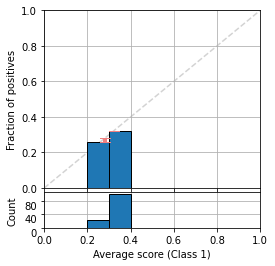

In [102]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_knn_beta, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('knn_beta.png')

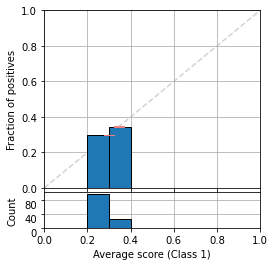

In [103]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_knn_beta_cv, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('knn_beta_cv.png')

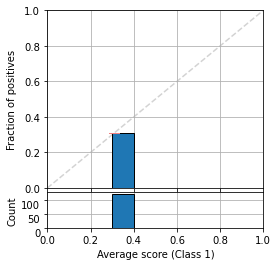

In [104]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_knn_iso, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('knn_iso.png')

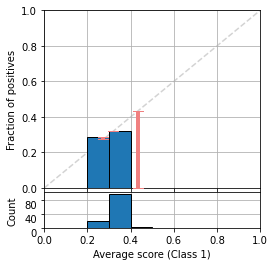

In [105]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_knn_iso_cv, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('knn_iso_cv.png')

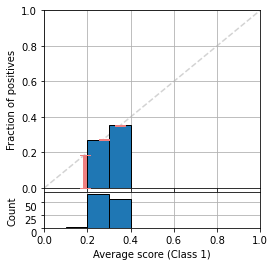

In [106]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_knn_sigm, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('knn_sigm.png')

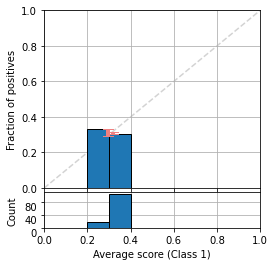

In [107]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_knn_sigm_cv, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('knn_sigm_cv.png')

## 3. SVC

In [108]:
# sigmoid
cal_svc_sigm = CalibratedClassifierCV(svc, cv="prefit", method='sigmoid')
cal_svc_sigm.fit(X_test, y_test)
scores_svc_sigm = cal_svc_sigm.predict_proba(X_test)

# Cross-validated Calibration
cal_svc_sigm_cv = CalibratedClassifierCV(svc, method='sigmoid')
cal_svc_sigm_cv.fit(X_train, y_train)
scores_svc_sigm_cv = cal_svc_sigm_cv.predict_proba(X_test)

# isotonic
cal_svc_iso = CalibratedClassifierCV(svc, cv="prefit", method='isotonic')
cal_svc_iso.fit(X_test, y_test)
scores_svc_iso = cal_svc_iso.predict_proba(X_test)

# Cross-validated Calibration
cal_svc_iso_cv = CalibratedClassifierCV(svc, method='isotonic')
cal_svc_iso_cv.fit(X_train, y_train)
scores_svc_iso_cv = cal_svc_iso_cv.predict_proba(X_test)

# beta
cal_svc_beta = CalibratedClassifierCV(svc, method='beta')
cal_svc_beta.fit(X_train, y_train)
scores_svc_beta = cal_svc_beta.predict_proba(X_test)

# Cross-validated Calibration
cal_svc_beta_cv = CalibratedClassifierCV(svc, cv="prefit", method='beta')
cal_svc_beta_cv.fit(X_test, y_test)
scores_svc_beta_cv = cal_svc_beta_cv.predict_proba(X_test)

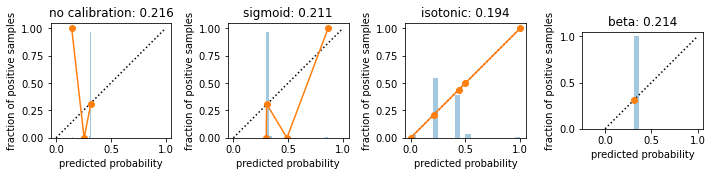

In [109]:
fig, axes = plt.subplots(1, 4, figsize=(10, 4))

for name, s, ax in zip(['no calibration', 'sigmoid', 'isotonic', 'beta'],
                       [scores_svc[:, 1], scores_svc_sigm[:, 1], scores_svc_iso[:, 1], scores_svc_beta[:, 1]], axes):
    plot_calibration_curve(y_test, s, n_bins=20, ax=ax)
    ax.set_title("{}: {:.3f}".format(name, brier_score_loss(y_test, s)))
plt.tight_layout()
plt.savefig("SVC after.png")

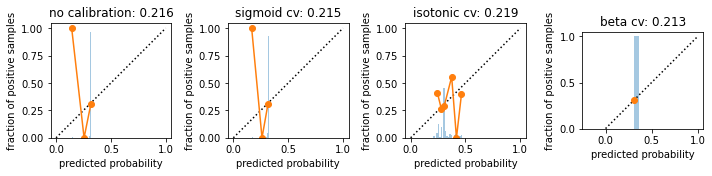

In [110]:
fig, axes = plt.subplots(1, 4, figsize=(10, 4))

for name, s, ax in zip(['no calibration', 'sigmoid cv', 'isotonic cv', 'beta cv'],
                       [scores_svc[:, 1], scores_svc_sigm_cv[:, 1], scores_svc_iso_cv[:, 1], scores_svc_beta_cv[:, 1]], axes):
    plot_calibration_curve(y_test, s, n_bins=20, ax=ax)
    ax.set_title("{}: {:.3f}".format(name, brier_score_loss(y_test, s)))
plt.tight_layout()
plt.savefig("SVC+CV.png")

In [111]:
pECE(y_test.values, scores_svc_sigm[:,1])

0.9833

In [112]:
pECE(y_test.values, scores_svc_sigm_cv[:,1])

0.7787

In [113]:
pECE(y_test.values, scores_svc_iso[:,1])

0.9972

In [114]:
pECE(y_test.values, scores_svc_iso_cv[:,1])

0.05025000000000002

In [115]:
pECE(y_test.values, scores_svc_beta[:,1])

0.88285

In [116]:
pECE(y_test.values, scores_svc_beta_cv[:,1])

0.9614

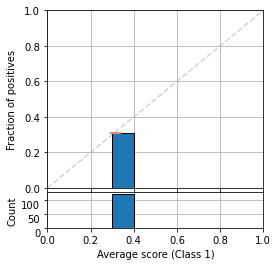

In [117]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_svc_beta, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('svc_beta.png')

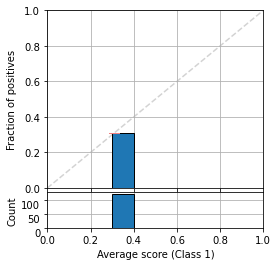

In [118]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_svc_beta_cv, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('svc_beta_cv.png')

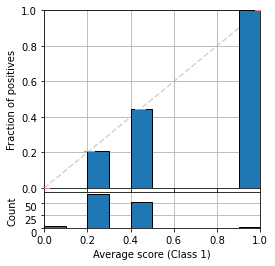

In [119]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_svc_iso, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('svc_iso.png')

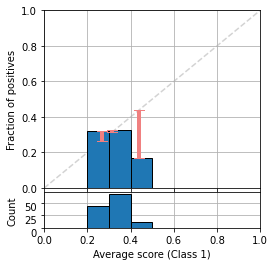

In [120]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_svc_iso_cv, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('svc_iso_cv.png')

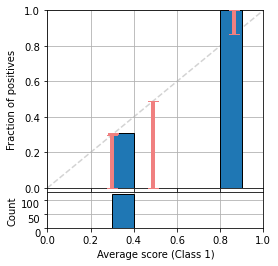

In [121]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_svc_sigm, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('svc_sigm.png')

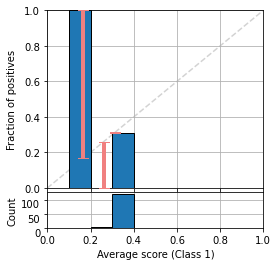

In [122]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_svc_sigm_cv, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('svc_sigm_cv.png')

## 4. DT

In [123]:
# sigmoid
cal_dt_sigm = CalibratedClassifierCV(dt, cv="prefit", method='sigmoid')
cal_dt_sigm.fit(X_test, y_test)
scores_dt_sigm = cal_dt_sigm.predict_proba(X_test)

# Cross-validated Calibration
cal_dt_sigm_cv = CalibratedClassifierCV(dt, method='sigmoid')
cal_dt_sigm_cv.fit(X_train, y_train)
scores_dt_sigm_cv = cal_dt_sigm_cv.predict_proba(X_test)

# isotonic
cal_dt_iso = CalibratedClassifierCV(dt, cv="prefit", method='isotonic')
cal_dt_iso.fit(X_test, y_test)
scores_dt_iso = cal_dt_iso.predict_proba(X_test)

# Cross-validated Calibration
cal_dt_iso_cv = CalibratedClassifierCV(dt, method='isotonic')
cal_dt_iso_cv.fit(X_train, y_train)
scores_dt_iso_cv = cal_dt_iso_cv.predict_proba(X_test)

# beta
cal_dt_beta = CalibratedClassifierCV(dt, method='beta')
cal_dt_beta.fit(X_train, y_train)
scores_dt_beta = cal_dt_beta.predict_proba(X_test)

# Cross-validated Calibration
cal_dt_beta_cv = CalibratedClassifierCV(dt, cv="prefit", method='beta')
cal_dt_beta_cv.fit(X_test, y_test)
scores_dt_beta_cv = cal_dt_beta_cv.predict_proba(X_test)

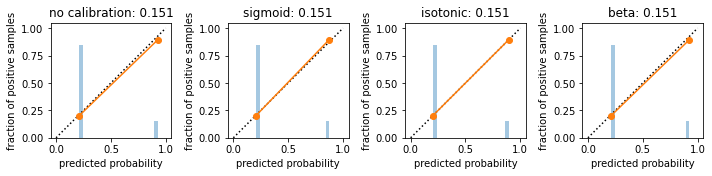

In [124]:
fig, axes = plt.subplots(1, 4, figsize=(10, 4))

for name, s, ax in zip(['no calibration', 'sigmoid', 'isotonic', 'beta'],
                       [scores_dt[:, 1], scores_dt_sigm[:, 1], scores_dt_iso[:, 1], scores_dt_beta[:, 1]], axes):
    plot_calibration_curve(y_test, s, n_bins=20, ax=ax)
    ax.set_title("{}: {:.3f}".format(name, brier_score_loss(y_test, s)))
plt.tight_layout()
plt.savefig("DT after.png")

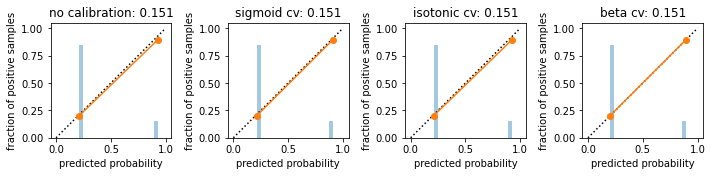

In [125]:
fig, axes = plt.subplots(1, 4, figsize=(10, 4))

for name, s, ax in zip(['no calibration', 'sigmoid cv', 'isotonic cv', 'beta cv'],
                       [scores_dt[:, 1], scores_dt_sigm_cv[:, 1], scores_dt_iso_cv[:, 1], scores_dt_beta_cv[:, 1]], axes):
    plot_calibration_curve(y_test, s, n_bins=20, ax=ax)
    ax.set_title("{}: {:.3f}".format(name, brier_score_loss(y_test, s)))
plt.tight_layout()
plt.savefig("DT+CV.png")

In [126]:
pECE(y_test.values, scores_dt_sigm[:,1])

0.9872

In [127]:
pECE(y_test.values, scores_dt_sigm_cv[:,1])

0.87635

In [128]:
pECE(y_test.values, scores_dt_iso[:,1])

0.9852

In [129]:
pECE(y_test.values, scores_dt_iso_cv[:,1])

0.8426

In [130]:
pECE(y_test.values, scores_dt_beta[:,1])

0.83935

In [131]:
pECE(y_test.values, scores_dt_beta_cv[:,1])

0.98405

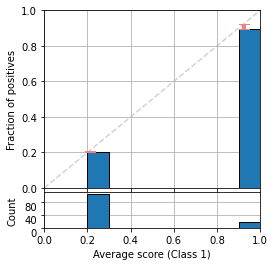

In [132]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_dt_beta, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('dt_beta.png')

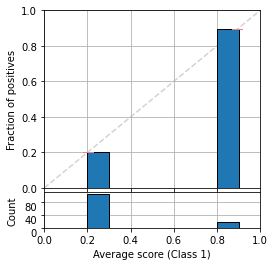

In [133]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_dt_beta_cv, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('dt_beta_cv.png')

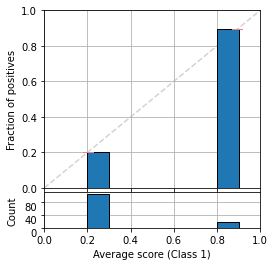

In [134]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_dt_iso, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('dt_iso.png')

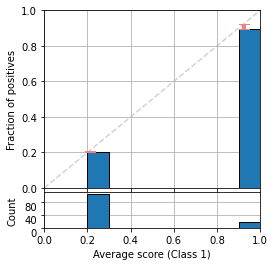

In [135]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_dt_iso_cv, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('dt_iso_cv.png')

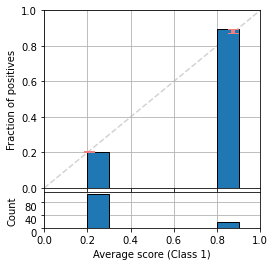

In [136]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_dt_sigm, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('dt_sigm.png')

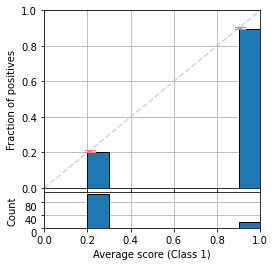

In [137]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_dt_sigm_cv, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('dt_sigm_cv.png')

----------------------------------------------------------------------
**********************************************************************
----------------------------------------------------------------------

In [138]:
# we will use 4 different models for training

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(random_state=42),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=42)
}

# build functions

### we are going to build 3 functions :
1) **loss** : to evaluate our models
* [precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)
* [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)
* [f1](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)
* [log_loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html)
* [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

2) **train_eval_train** : to evaluate our models in the same data that we train it on .

3) **train_eval_cross** : to evaluate our models using different data that we train the model on .
* [StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html)

### so you may ask why we don't just train our model and evaluate it without building this functions ?

actually you can do that,but mostly your model will not work good at beginning, so you need to change something about your data to improve your accuracy ,
by changing i mean **data processing**, and every step you will make, you should **evaluate your model** to see if it is improving or not, so to not do this step every time, this functions will make life easy as you go :)


In [139]:
# loss

from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score

def loss(y_true, y_pred, retu=False):
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    loss = log_loss(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    
    if retu:
        return pre, rec, f1, loss, acc
    else:
        print('  pre: %.3f\n  rec: %.3f\n  f1: %.3f\n  loss: %.3f\n  acc: %.3f' % (pre, rec, f1, loss, acc))

In [140]:
# train_eval_train

def train_eval_train(models, X, y):
    for name, model in models.items():
        print(name,':')
        model.fit(X, y)
        loss(y, model.predict(X))
        print('-'*30)
        
train_eval_train(models, X_train, y_train)

# we can see that best model is LogisticRegression at least for now, SVC is just memorizing the data so it is overfitting .

LogisticRegression :
  pre: 0.930
  rec: 0.429
  f1: 0.587
  loss: 6.542
  acc: 0.811
------------------------------
KNeighborsClassifier :
  pre: 0.667
  rec: 0.364
  f1: 0.471
  loss: 8.863
  acc: 0.743
------------------------------
SVC :
  pre: 1.000
  rec: 0.013
  f1: 0.026
  loss: 10.692
  acc: 0.690
------------------------------
DecisionTreeClassifier :
  pre: 0.929
  rec: 0.422
  f1: 0.580
  loss: 6.612
  acc: 0.809
------------------------------


In [141]:
X_train.shape

(491, 11)

In [142]:
# train_eval_cross
# in the next cell i will be explaining this function

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

def train_eval_cross(models, X, y, folds):
    # we will change X & y to dataframe because we will use iloc (iloc don't work on numpy array)
    X = pd.DataFrame(X) 
    y = pd.DataFrame(y)
    idx = [' pre', ' rec', ' f1', ' loss', ' acc']
    for name, model in models.items():
        ls = []
        print(name,':')

        for train, test in folds.split(X, y):
            model.fit(X.iloc[train], y.iloc[train]) 
            y_pred = model.predict(X.iloc[test]) 
            ls.append(loss(y.iloc[test], y_pred, retu=True))
        print(pd.DataFrame(np.array(ls).mean(axis=0), index=idx)[0])  #[0] because we don't want to show the name of the column
        print('-'*30)
        
train_eval_cross(models, X_train, y_train, skf)

# ohhh, as i said SVC is just memorizing the data, and you can see that here DecisionTreeClassifier is better than LogisticRegression 

LogisticRegression :
 pre     0.894048
 rec     0.422500
 f1      0.562733
 loss    6.752695
 acc     0.804490
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre      0.379834
 rec      0.207500
 f1       0.259954
 loss    12.381887
 acc      0.641510
Name: 0, dtype: float64
------------------------------
SVC :
 pre      0.000000
 rec      0.000000
 f1       0.000000
 loss    11.043955
 acc      0.680245
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.919048
 rec     0.422500
 f1      0.565740
 loss    6.611717
 acc     0.808571
Name: 0, dtype: float64
------------------------------


In [143]:
# some explanation of the above function

x = []
idx = [' pre', ' rec', ' f1', ' loss', ' acc']

# we will use one model
log = LogisticRegression()

for train, test in skf.split(X_train, y_train):
    log.fit(X_train.iloc[train], y_train.iloc[train])
    ls = loss(y_train.iloc[test], log.predict(X_train.iloc[test]), retu=True)
    x.append(ls)
    
# thats what we get
pd.DataFrame(x, columns=idx)

# (column 0 represent the precision_score of the 10 folds)
# (row 0 represent the (pre, rec, f1, loss, acc) for the first fold)
# then we should find the mean of every column
# pd.DataFrame(x, columns=idx).mean(axis=0)

,pre,rec,f1,loss,acc
0,0.875000,0.437500,0.583333,6.907771,0.800000
1,0.833333,0.333333,0.476190,7.753619,0.775510
2,0.875000,0.466667,0.608696,6.343873,0.816327
3,0.500000,0.200000,0.285714,10.573144,0.693878
4,1.000000,0.466667,0.636364,5.638984,0.836735
5,0.857143,0.400000,0.545455,7.048746,0.795918
6,1.000000,0.733333,0.846154,2.819492,0.918367
7,1.000000,0.625000,0.769231,4.229238,0.877551
8,1.000000,0.250000,0.400000,8.458476,0.755102
9,1.000000,0.312500,0.476190,7.753603,0.775510


# Let's start to improve our model

# features engineer

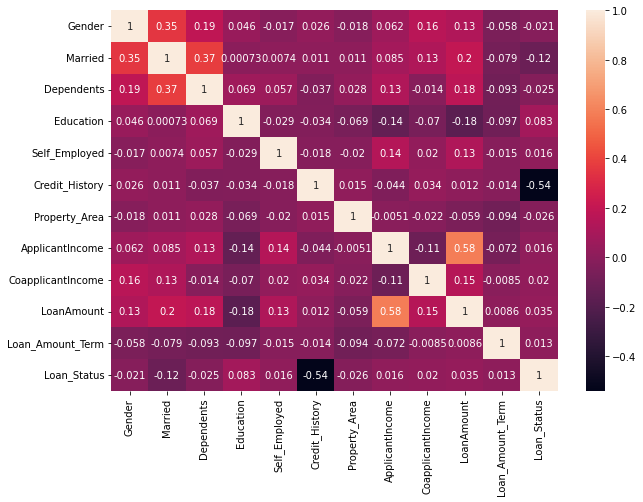

In [144]:
# ooh, we got it right for most of the features, as you can see we've say at the first of the kernel ,
# that Credit_Histroy and Married etc, are good features, actually Credit_Histroy is the best .

data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);

# here we got 58% similarity between LoanAmount & ApplicantIncome 
# and that may be bad for our model so we will see what we can do

In [145]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
415,0,0,0,0,0,1,2,2995.0,0.0,60.0,360.0
26,1,1,0,0,0,1,1,2799.0,2253.0,122.0,360.0
394,1,1,2,0,0,1,2,3100.0,1400.0,113.0,360.0
584,1,1,1,0,0,0,0,2787.0,1917.0,146.0,360.0
86,1,1,2,1,0,1,1,3333.0,2000.0,99.0,360.0


In [146]:
# I will try to make some operations on some features, here I just tried diffrent operations on diffrent features,
# having experience in the field, and having knowledge about the data will also help

X_train['new_col'] = X_train['CoapplicantIncome'] / X_train['ApplicantIncome']  
X_train['new_col_2'] = X_train['LoanAmount'] * X_train['Loan_Amount_Term'] 

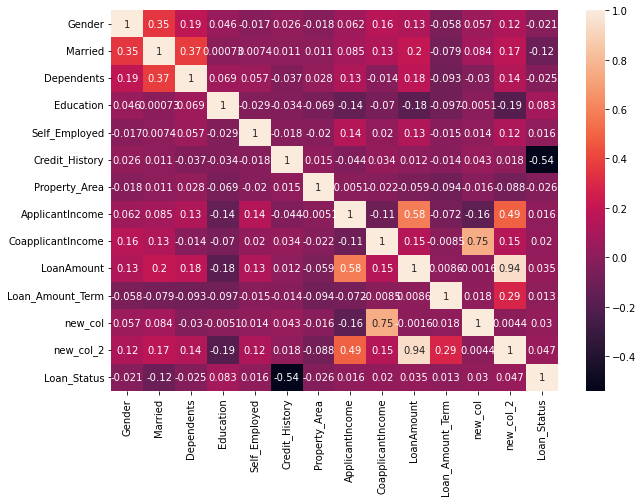

In [147]:
data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);

# new_col 0.03 , new_col_2, 0.047
# not that much , but that will help us reduce the number of features

In [148]:
X_train.drop(['CoapplicantIncome', 'ApplicantIncome', 'Loan_Amount_Term', 'LoanAmount'], axis=1, inplace=True)

In [149]:
train_eval_cross(models, X_train, y_train, skf)

# ok, SVC is improving, but LogisticRegression is overfitting
# i wan't change nothing so we can see what will happen as we go

LogisticRegression :
 pre      0.000000
 rec      0.000000
 f1       0.000000
 loss    10.832488
 acc      0.686367
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre      0.305317
 rec      0.162500
 f1       0.211087
 loss    12.951426
 acc      0.625020
Name: 0, dtype: float64
------------------------------
SVC :
 pre      0.000000
 rec      0.000000
 f1       0.000000
 loss    10.832488
 acc      0.686367
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.919048
 rec     0.422500
 f1      0.565740
 loss    6.611717
 acc     0.808571
Name: 0, dtype: float64
------------------------------


In [150]:
# first lets take a look at the value counts of every label

for i in range(X_train.shape[1]):
    print(X_train.iloc[:,i].value_counts(), end='\n------------------------------------------------\n')

1    398
0     93
Name: Gender, dtype: int64
------------------------------------------------
1    315
0    176
Name: Married, dtype: int64
------------------------------------------------
0    292
2     85
1     78
3     36
Name: Dependents, dtype: int64
------------------------------------------------
0    382
1    109
Name: Education, dtype: int64
------------------------------------------------
0    428
1     63
Name: Self_Employed, dtype: int64
------------------------------------------------
1    421
0     70
Name: Credit_History, dtype: int64
------------------------------------------------
1    179
2    170
0    142
Name: Property_Area, dtype: int64
------------------------------------------------
0.000000    222
0.414374      1
0.441544      1
0.556065      1
0.985459      1
           ... 
0.750075      1
0.964755      1
0.743616      1
5.365854      1
0.859254      1
Name: new_col, Length: 270, dtype: int64
------------------------------------------------
43200.0     18
3960

### we will work on the features that have varied values

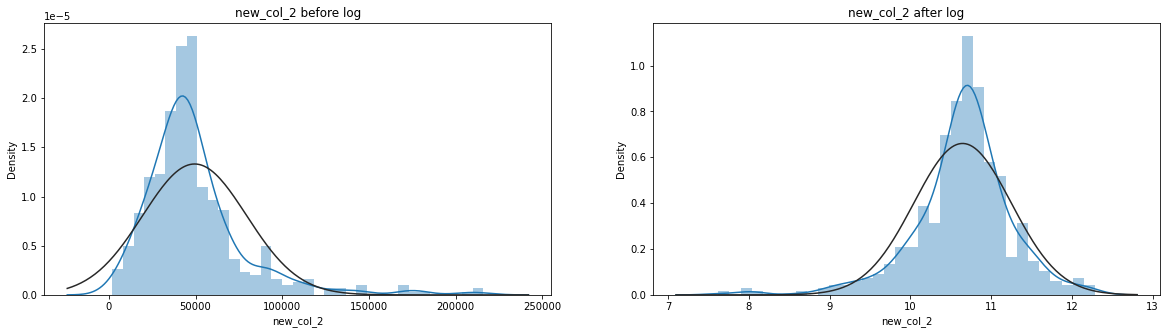

In [151]:
# new_col_2

# we can see we got right_skewed
# we can solve this problem with very simple statistical teqniq , by taking the logarithm of all the values
# because when data is normally distributed that will help improving our model

from scipy.stats import norm

fig, ax = plt.subplots(1,2,figsize=(20,5))

sns.distplot(X_train['new_col_2'], ax=ax[0], fit=norm)
ax[0].set_title('new_col_2 before log')

X_train['new_col_2'] = np.log(X_train['new_col_2'])  # logarithm of all the values

sns.distplot(X_train['new_col_2'], ax=ax[1], fit=norm)
ax[1].set_title('new_col_2 after log');

In [152]:
# now we will evaluate our models, and i will do that continuously ,so i don't need to mention that every time

train_eval_cross(models, X_train, y_train, skf)

# wooow our models improved really good by just doing the previous step .

LogisticRegression :
 pre     0.899048
 rec     0.429167
 f1      0.569764
 loss    6.611718
 acc     0.808571
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre     0.685278
 rec     0.336667
 f1      0.439734
 loss    8.860292
 acc     0.743469
Name: 0, dtype: float64
------------------------------
SVC :
 pre     0.811548
 rec     0.311667
 f1      0.444833
 loss    7.811411
 acc     0.773837
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.919048
 rec     0.422500
 f1      0.565740
 loss    6.611717
 acc     0.808571
Name: 0, dtype: float64
------------------------------


In [153]:
# new_col

# most of our data is 0 , so we will try to change other values to 1

print('before:')
print(X_train['new_col'].value_counts())

X_train['new_col'] = [x if x==0 else 1 for x in X_train['new_col']]
print('-'*50)
print('\nafter:')
print(X_train['new_col'].value_counts())

before:
0.000000    222
0.414374      1
0.441544      1
0.556065      1
0.985459      1
           ... 
0.750075      1
0.964755      1
0.743616      1
5.365854      1
0.859254      1
Name: new_col, Length: 270, dtype: int64
--------------------------------------------------

after:
1.0    269
0.0    222
Name: new_col, dtype: int64


In [154]:
train_eval_cross(models, X_train, y_train, skf)

# ok we are improving our models as we go 

LogisticRegression :
 pre     0.910714
 rec     0.422500
 f1      0.562606
 loss    6.682206
 acc     0.806531
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre     0.728690
 rec     0.298333
 f1      0.408207
 loss    9.004080
 acc     0.739306
Name: 0, dtype: float64
------------------------------
SVC :
 pre     0.819048
 rec     0.324167
 f1      0.458747
 loss    7.669026
 acc     0.777959
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.919048
 rec     0.422500
 f1      0.565740
 loss    6.611717
 acc     0.808571
Name: 0, dtype: float64
------------------------------


In [155]:
for i in range(X_train.shape[1]):
    print(X_train.iloc[:,i].value_counts(), end='\n------------------------------------------------\n')
    
# looks better

1    398
0     93
Name: Gender, dtype: int64
------------------------------------------------
1    315
0    176
Name: Married, dtype: int64
------------------------------------------------
0    292
2     85
1     78
3     36
Name: Dependents, dtype: int64
------------------------------------------------
0    382
1    109
Name: Education, dtype: int64
------------------------------------------------
0    428
1     63
Name: Self_Employed, dtype: int64
------------------------------------------------
1    421
0     70
Name: Credit_History, dtype: int64
------------------------------------------------
1    179
2    170
0    142
Name: Property_Area, dtype: int64
------------------------------------------------
1.0    269
0.0    222
Name: new_col, dtype: int64
------------------------------------------------
10.673596    18
10.586584    13
10.961278    11
10.491274    11
10.738134     9
             ..
11.643954     1
10.595634     1
9.856396      1
9.963641      1
12.100712     1
Name: new_

# Outliers

#### there is different techniques to handle outliers, here we are going to use [**IQR**](https://www.youtube.com/watch?v=qLYYHWYr8xI)

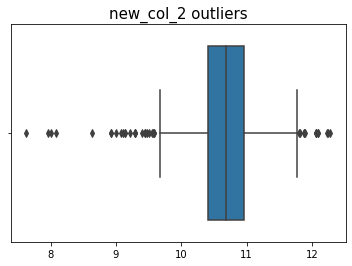

In [156]:
# we will use boxplot to detect outliers

sns.boxplot(X_train['new_col_2']);
plt.title('new_col_2 outliers', fontsize=15);
plt.xlabel('');

In [157]:
threshold = 1.5  # this number is hyper parameter , as much as you reduce it, as much as you remove more points
                 # you can just try different values the deafult value is (1.5) it works good for most cases
                 # but be careful, you don't want to try a small number because you may loss some important information from the data .
                 
            
new_col_2_out = X_train['new_col_2']
q25, q75 = np.percentile(new_col_2_out, 25), np.percentile(new_col_2_out, 75) # Q25, Q75
print('Quartile 25: {} , Quartile 75: {}'.format(q25, q75))

iqr = q75 - q25
print('iqr: {}'.format(iqr))

cut = iqr * threshold
lower, upper = q25 - cut, q75 + cut
print('Cut Off: {}'.format(cut))
print('Lower: {}'.format(lower))
print('Upper: {}'.format(upper))

outliers = [x for x in new_col_2_out if x < lower or x > upper]
print('Nubers of Outliers: {}'.format(len(outliers)))
print('outliers:{}'.format(outliers))

data_outliers = pd.concat([X_train, y_train], axis=1)
print('\nlen X_train before dropping the outliers', len(data_outliers))
data_outliers = data_outliers.drop(data_outliers[(data_outliers['new_col_2'] > upper) | (data_outliers['new_col_2'] < lower)].index)

print('len X_train before dropping the outliers', len(data_outliers))

Quartile 25: 10.416008100285975 , Quartile 75: 10.961277846683982
iqr: 0.5452697463980076
Cut Off: 0.8179046195970114
Lower: 9.598103480688962
Upper: 11.779182466280993
Nubers of Outliers: 39
outliers:[12.092679958175083, 8.930626469173578, 7.620705086838262, 12.254862809699606, 7.965545573129992, 9.574983485564092, 9.392661928770137, 9.578311275656766, 9.587406005562649, 9.112948025967533, 8.006367567650246, 9.144200569471638, 9.287301413112312, 9.441452092939569, 9.287301413112312, 12.059890135352092, 8.626944055375356, 9.51044496442652, 11.81569317484005, 9.441452092939569, 8.922658299524402, 9.287301413112312, 11.889991098556695, 12.059890135352092, 12.059890135352092, 12.231740392278752, 9.469622969906265, 9.137769679141348, 11.799607037088427, 9.084777149000837, 9.21830854162536, 8.99961934066053, 8.083328608786376, 12.283033686666302, 9.549665677579801, 11.877568578558138, 11.877568578558138, 12.100712129872347, 9.441452092939569]

len X_train before dropping the outliers 491
le

In [158]:
X_train = data_outliers.drop('Loan_Status', axis=1)
y_train = data_outliers['Loan_Status']

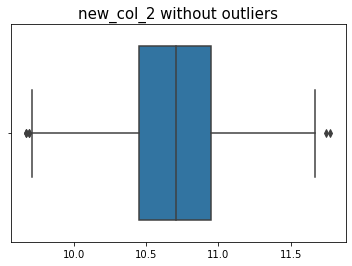

In [159]:
sns.boxplot(X_train['new_col_2']);
plt.title('new_col_2 without outliers', fontsize=15);
plt.xlabel('');

# good :)

In [160]:
train_eval_cross(models, X_train, y_train, skf)

LogisticRegression :
 pre     0.907500
 rec     0.442857
 f1      0.587307
 loss    6.423889
 acc     0.814010
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre     0.753651
 rec     0.335714
 f1      0.453839
 loss    8.416145
 acc     0.756329
Name: 0, dtype: float64
------------------------------
SVC :
 pre     0.643333
 rec     0.235714
 f1      0.340616
 loss    8.406109
 acc     0.756618
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.920833
 rec     0.442857
 f1      0.589413
 loss    6.347135
 acc     0.816232
Name: 0, dtype: float64
------------------------------


# features selection

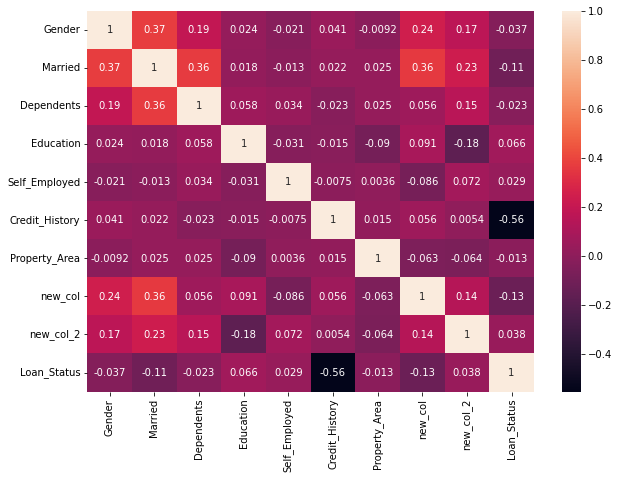

In [161]:
# Self_Employed got really bad corr (-0.00061) , let's try remove it and see what will happen

data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);

In [162]:
#X_train.drop(['Self_Employed'], axis=1, inplace=True)

train_eval_cross(models, X_train, y_train, skf)

# looks like Self_Employed is not important
# KNeighborsClassifier improved

# droping all the features Except for Credit_History actually improved KNeighborsClassifier and didn't change anything in other models
# so you can try it by you self
# but don't forget to do that on testing data too

#X_train.drop(['Self_Employed','Dependents', 'new_col_2', 'Education', 'Gender', 'Property_Area','Married', 'new_col'], axis=1, inplace=True)

LogisticRegression :
 pre     0.907500
 rec     0.442857
 f1      0.587307
 loss    6.423889
 acc     0.814010
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre     0.753651
 rec     0.335714
 f1      0.453839
 loss    8.416145
 acc     0.756329
Name: 0, dtype: float64
------------------------------
SVC :
 pre     0.643333
 rec     0.235714
 f1      0.340616
 loss    8.406109
 acc     0.756618
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.920833
 rec     0.442857
 f1      0.589413
 loss    6.347135
 acc     0.816232
Name: 0, dtype: float64
------------------------------


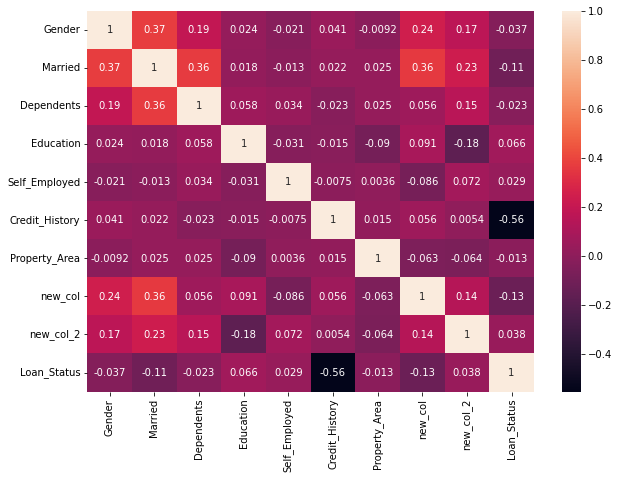

In [163]:
data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);

# evaluate the models on Test_data

here we will just repeat what we did in training data

In [164]:
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
182,1,1,0,0,0,1,1,4600.0,0.0,73.0,180.0
440,1,0,0,0,0,1,1,3660.0,5064.0,187.0,360.0
276,1,1,0,0,0,1,1,3993.0,3274.0,207.0,360.0
533,1,0,1,0,0,1,1,11250.0,0.0,196.0,360.0
504,1,1,0,1,0,1,1,3814.0,1483.0,124.0,300.0


In [165]:
X_test_new = X_test.copy()

In [166]:
x = []

X_test_new['new_col'] = X_test_new['CoapplicantIncome'] / X_test_new['ApplicantIncome']  
X_test_new['new_col_2'] = X_test_new['LoanAmount'] * X_test_new['Loan_Amount_Term']
X_test_new.drop(['CoapplicantIncome', 'ApplicantIncome', 'Loan_Amount_Term', 'LoanAmount'], axis=1, inplace=True)

X_test_new['new_col_2'] = np.log(X_test_new['new_col_2'])

X_test_new['new_col'] = [x if x==0 else 1 for x in X_test_new['new_col']]

#X_test_new.drop(['Self_Employed'], axis=1, inplace=True)

# drop all the features Except for Credit_History
#X_test_new.drop(['Self_Employed','Dependents', 'new_col_2', 'Education', 'Gender', 'Property_Area','Married', 'new_col'], axis=1, inplace=True)

In [167]:
X_test_new.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,new_col,new_col_2
182,1,1,0,0,0,1,1,0.0,9.483416
440,1,0,0,0,0,1,1,1.0,11.117213
276,1,1,0,0,0,1,1,1.0,11.218823
533,1,0,1,0,0,1,1,0.0,11.164219
504,1,1,0,1,0,1,1,1.0,10.524064


In [168]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,new_col,new_col_2
415,0,0,0,0,0,1,2,0.0,9.980449
26,1,1,0,0,0,1,1,1.0,10.690125
394,1,1,2,0,0,1,2,1.0,10.613492
584,1,1,1,0,0,0,0,1.0,10.869711
86,1,1,2,1,0,1,1,1.0,10.481224


In [169]:
for name,model in models.items():
    print(name, end=':\n')
    loss(y_test, model.predict(X_test_new))
    print('-'*40)

LogisticRegression:
  pre: 0.850
  rec: 0.447
  f1: 0.586
  loss: 6.739
  acc: 0.805
----------------------------------------
KNeighborsClassifier:
  pre: 0.615
  rec: 0.421
  f1: 0.500
  loss: 8.986
  acc: 0.740
----------------------------------------
SVC:
  pre: 0.867
  rec: 0.342
  f1: 0.491
  loss: 7.582
  acc: 0.780
----------------------------------------
DecisionTreeClassifier:
  pre: 0.895
  rec: 0.447
  f1: 0.596
  loss: 6.458
  acc: 0.813
----------------------------------------


**Conclusion:**

what ever we do, our **recall score** will not improving , maybe because we don't have a good amount of data, so I think if we got **more data** and we try more **complex models** our accuracy will improve,I am not sure about this, so please if I made any mistakes in this kernel , or if you have any suggestions which can improve the accuracy please feel free to share it with us in the comments .

Thanks :)